In [1]:
%matplotlib inline

In [2]:
from numpy import *
from matplotlib.pyplot import *
from scipy.misc import factorial # cargamos la implementación vectorializada de la función factorial, desde el paquete scipy.misc

# Definiendo y graficando la distribución de Poisson

Primeros definimos nuestra propia versión de la función de distribución de probabilidades de Poisson:
\begin{equation}
P(x,\lambda)=\frac{e^{-\lambda}x^\lambda}{x!}
\end{equation}

In [3]:
def mipoisson(x,l):
    return exp(-l)*(l**x)/factorial(x)

Ahora definimos una función que confecciona un gráfico de la distribución, para un valor de $\lambda$ dado:

In [4]:
def p(l):
    x=arange(0,20)
    plot(x,mipoisson(x,l),'o-',label=r'$\lambda= $'+str(l))
    title(u'Distribución de Poisson')
    xlabel('$x$')
    ylabel('$P(x)$')
    xlim(-1,20)
    ylim(0,0.4)
    grid()

Y con ella graficamos algunos casos interesantes:

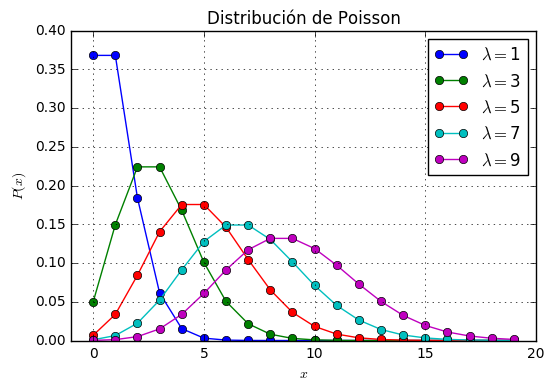

In [5]:
for l in range(1,11,2):
    p(l)
    legend()

También podemos visualizar cómo cambia la distribución de Poisson al cambiar el parámetro $\lambda$ usando las opciones de interactividad de (las versiones recientes de) Ipython:

<function __main__.p>

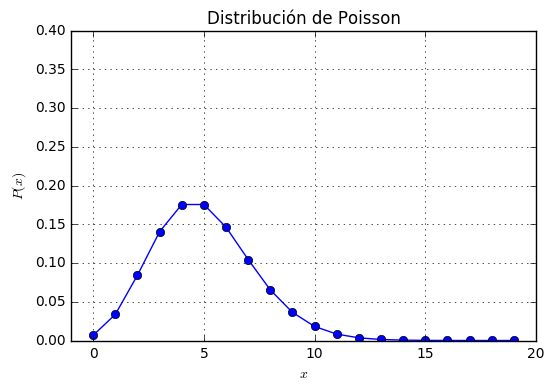

In [6]:
from IPython.html.widgets import interact
interact(p,l=(0,10,1))

# Usando la funciones predefinidas en Scipy

La distribución de Poisson y muchas de las funciones asociadas a ella están implementadas en la clase `poisson` del subpaquete estadístico de Scipy (scipy.stats), que podemos importar con:

In [7]:
from scipy.stats import poisson

Para visualizar información de esta clase podemos, como siempre, invocar la funcion `help`:

In [8]:
help(poisson)

Help on poisson_gen in module scipy.stats._discrete_distns object:

class poisson_gen(scipy.stats._distn_infrastructure.rv_discrete)
 |  A Poisson discrete random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability mass function for `poisson` is::
 |  
 |      poisson.pmf(k) = exp(-mu) * mu**k / k!
 |  
 |  for ``k >= 0``.
 |  
 |  `poisson` takes ``mu`` as shape parameter.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      poisson_gen
 |      scipy.stats._distn_infrastructure.rv_discrete
 |      scipy.stats._distn_infrastructure.rv_generic
 |      __builtin__.object
 |  
 |  Methods inherited from scipy.stats._distn_infrastructure.rv_discrete:
 |  
 |  __init__(self, a=0, b=inf, name=None, badvalue=None, moment_tol=1e-08, values=None, inc=1, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  cdf(self, k, *args, **kwds)
 |      Cumulative distribution function of the given RV.
 |      
 |      Parameters
 |  

La función de probabilidad, también llamada en inglés `probability mass function (pmf)` ("función de probabilidad de masa") en el caso discrto, es dada por la función `poisson.pmf`:

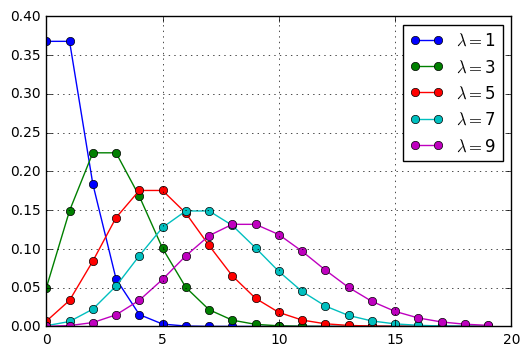

In [9]:
x=range(0,20)
for l in range(1,10,2):
    plot(x,poisson.pmf(x,l),'o-',label=r'$\lambda= $'+str(l))
grid()
legend()

Similarmente, `poisson.cdf` implementa la función *densidad de probabilidad acumulada*:

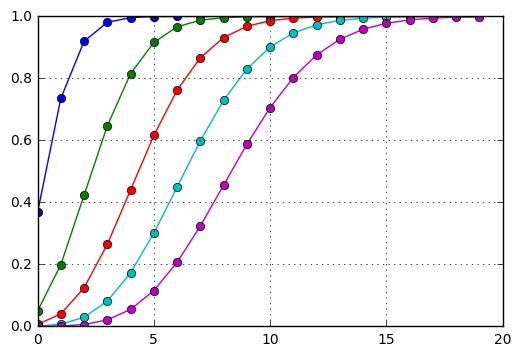

In [10]:
x=range(0,20)
for l in range(1,10,2):
    plot(x,poisson.cdf(x,l),'o-')
grid()

Podemos calcular la media y la desviación estándar de la distribución usando `poisson.mean`($\lambda$) y `poisson.std`($\lambda$), verificando que estos valores son iguales a $\lambda$ y $\sqrt{\lambda}$ respectivamente. Por ejemplo,

In [11]:
poisson.mean(9), poisson.std(9)

(9.0, 3.0)

Finalmente, también está implementado un *generador de números aleatorios* (enteros, positivos) que siguen la distribución de Poisson con un parámetro $\lambda$ dado, a través de la función `poisson.rvs`($\lambda$):

In [12]:
poisson.rvs(3)

3

Tal como en los casos de otras distribuciones de probabilidad, podemos generar un arreglo de $N$ números aleatorios agregando la opción `size=N`:

In [13]:
poisson.rvs(3,size=20)

array([5, 3, 4, 3, 3, 3, 2, 5, 2, 3, 0, 4, 2, 4, 2, 3, 4, 4, 2, 4])

Como último ejemplo, generamos una muestra de $N=10^4$ números aleatorios usando `poisson.rvs` con $\lambda=3$ y luego realizamos un histograma de los resultados. En el gráfico siguiente comparamos el histograma con el número esperado de acuerdo a la función de probabilidad, es decir, $N\cdot p(x_\alpha)$, con $\{x_\alpha\}=\{0,1,2,3,\cdots\}$:

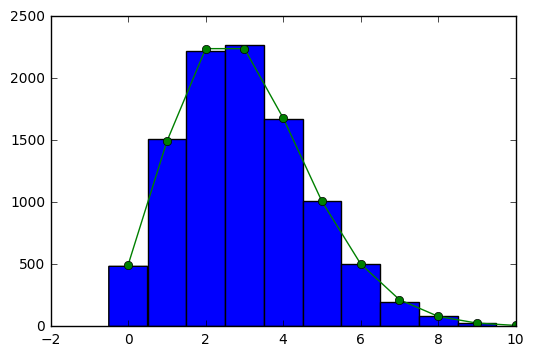

In [14]:
x=arange(0,11)
N=10**4
hist(poisson.rvs(3,size=N),x-0.5)
plot(x,N*poisson.pmf(x,3),'o-')

Podemos visualizar en forma interactiva cómo el histograma tiende al límite esperado al aumentar el número $N$ de elementos de la muestra, usando nuevamente las función `interact` de Ipython:

In [15]:
def p2(N=100):
    figure(figsize=(5,5))
    x=arange(0,11)
    hist(poisson.rvs(3,size=N),x-0.5)
    plot(x,N*poisson.pmf(x,3),'o-')

<function __main__.p2>

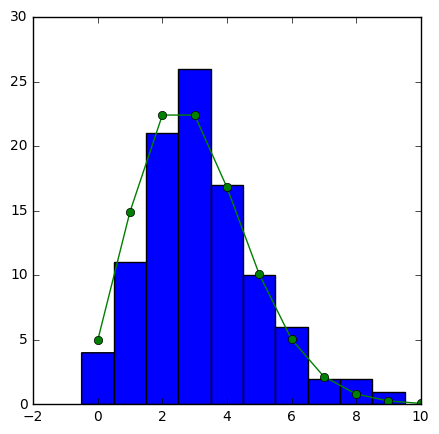

In [16]:
interact(p2,N=(10,10**4,10**2))